In [46]:
import os
import sys
from pathlib import Path

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_style("whitegrid")
plt.rcParams['font.size'] = 12          # Base font size
plt.rcParams['axes.titlesize'] = 18     # Axes title
plt.rcParams['axes.labelsize'] = 18     # X and Y labels
plt.rcParams['xtick.labelsize'] = 16    # X tick labels
plt.rcParams['ytick.labelsize'] = 16    # Y tick labels
plt.rcParams['legend.fontsize'] = 16    # Legend
plt.rcParams['legend.title_fontsize'] = 16    # Legend Title
plt.rcParams['figure.titlesize'] = 30   # Figure title (suptitle)

sys.path.insert(0, os.path.abspath(os.path.join(os.getcwd(), "..", "..")))
from src.utils.k_folds_creator import KFoldCreator

In [47]:
train_df = pd.read_csv(Path(os.getcwd()).parent.parent / "data" / "train.csv")

In [48]:
fold_creator = KFoldCreator(n_splits=5, seed=42)
train_df = fold_creator.create_folds(train_df, stratify_col='expert_consensus', group_col='patient_id')

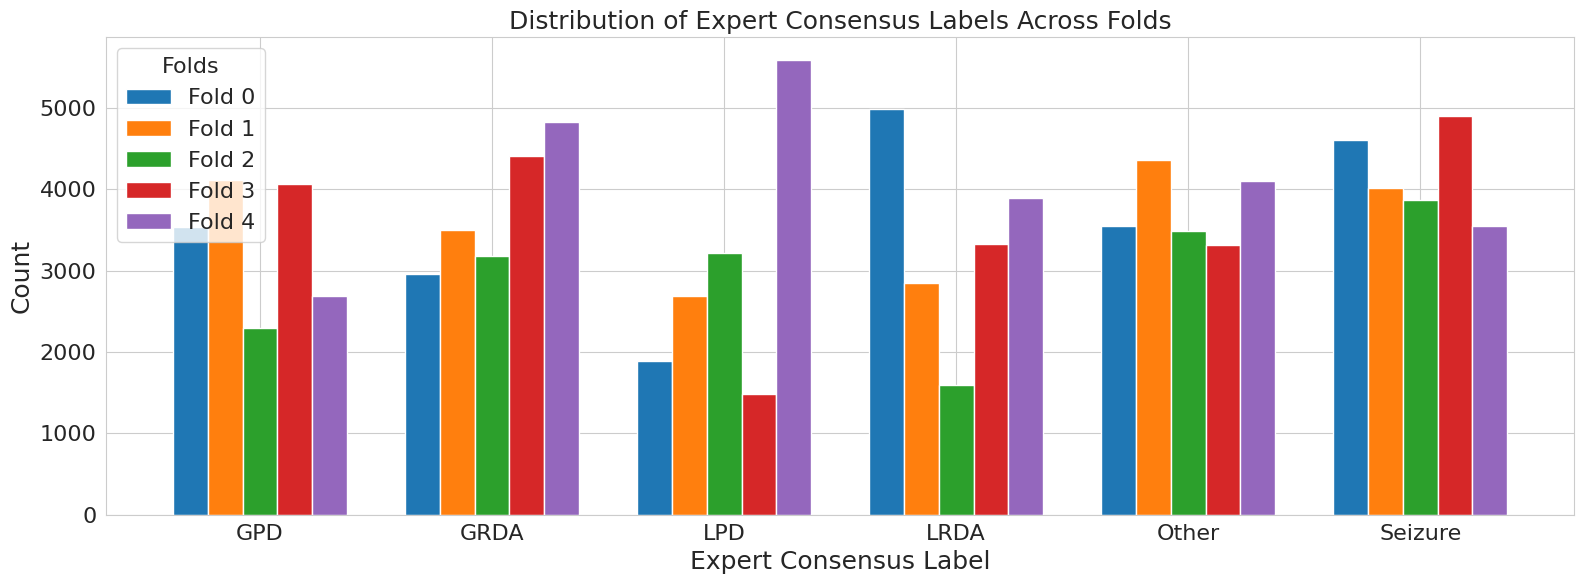

In [49]:
fig, (ax) = plt.subplots(1, 1, figsize=(16, 6))

ax.set_title("Distribution of Expert Consensus Labels Across Folds")
bar_width = 0.15
labels = sorted(train_df['expert_consensus'].unique())
x = np.arange(len(labels))
for fold in range(5):
    fold_data = train_df[train_df['fold'] == fold]
    counts = fold_data['expert_consensus'].value_counts().reindex(labels, fill_value=0)
    ax.bar(x + fold * bar_width, counts, width=bar_width, label=f'Fold {fold}')
    
ax.set_xlabel('Expert Consensus Label')
ax.set_ylabel('Count')
ax.set_xticks(x + bar_width * 2)
ax.set_xticklabels(labels)
ax.legend(title='Folds')
plt.tight_layout()

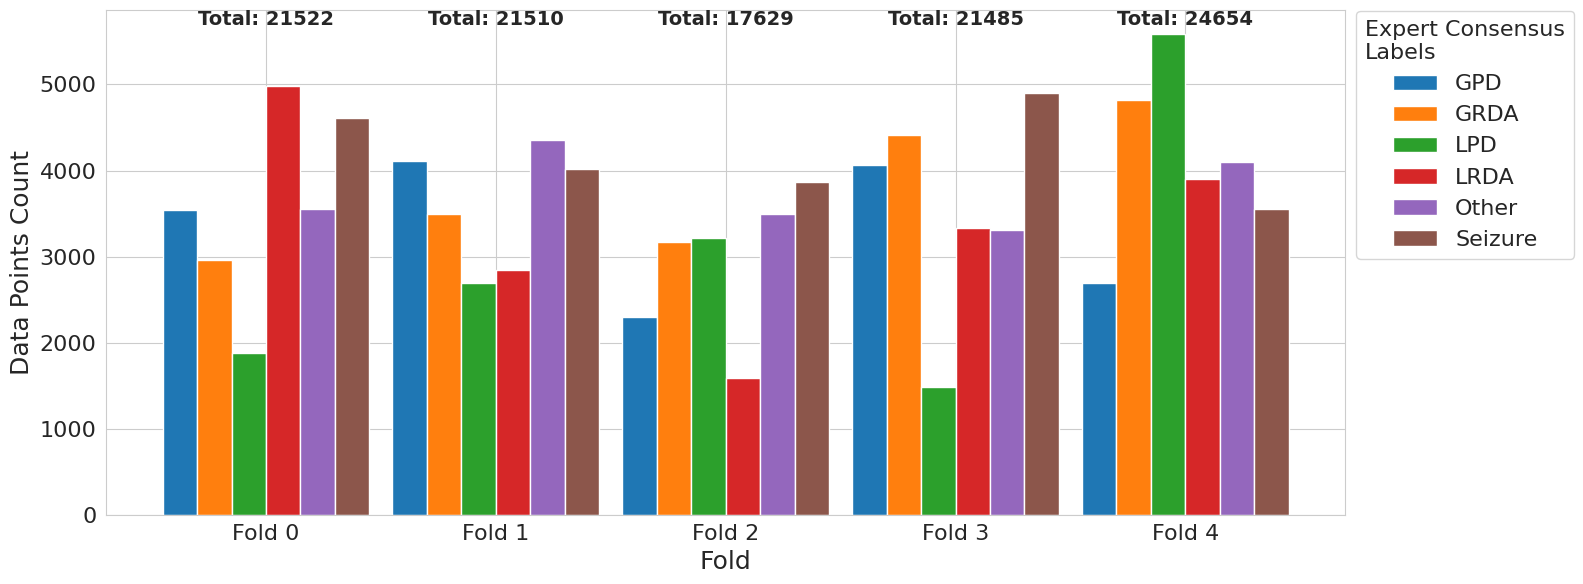

In [64]:
fig, (ax) = plt.subplots(1, 1, figsize=(16, 6))

bar_width = 0.15
labels = sorted(train_df['expert_consensus'].unique()) # Seizure, LPD, etc
x = np.arange(5)

# Calculate totals for each fold
fold_totals = train_df['fold'].value_counts().reindex(range(5), fill_value=0)

for label in labels:
    label_data = train_df[train_df['expert_consensus'] == label]
    counts = label_data['fold'].value_counts().reindex(range(5), fill_value=0)
    ax.bar(x + labels.index(label) * bar_width, counts, width=bar_width, label=label)

# Add total counts above each fold group
for i, fold_idx in enumerate(range(5)):
    total = fold_totals[fold_idx]
    # Position the text at the center of the grouped bars, slightly above the tallest bar
    x_pos = i + bar_width * (len(labels) - 1) / 2
    y_pos = ax.get_ylim()[1] * 1.0
    ax.text(x_pos, y_pos, f'Total: {total}', 
            ha='center', va='top', fontsize=14, fontweight='bold')
    
ax.set_xlabel('Fold')
ax.set_ylabel('Data Points Count')
ax.set_xticks(x + bar_width * (len(labels) - 1) / 2)
ax.set_xticklabels([f'Fold {i}' for i in range(5)])
ax.legend(title='Expert Consensus\nLabels', bbox_to_anchor=(1.0, 1.02))
plt.tight_layout()

fig.savefig("fold_distributions.svg")